<a href="https://colab.research.google.com/github/Danieljjjjjj/Applied-AI-with-Deep-learning-By-IBM-Coursera/blob/master/CAPSTONE_ADVANCED_PROJECT_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Peer-graded Assignment: Project Asset Submission
The grading criteria:
Use Case

Data Set

Data Quality Assessment

Data Exploration (e.g. correlation between columns)

Data Visualization (e.g. value distribution of columns)

At least one Feature Engineering (e.g. imputing missing values) applied
Selection and justification of Model Performance Indicator (e.g. F1 score)

At least one traditional Machine Learning Algorithm and one DeepLearning
Algorithm applied and demonstrated

Model performance between different feature engineerings and models compared and documented

Answer the following
Please assign one point for each item below which is properly covered in the ADD




Why have I chosen a specific method for data quality assessment?
Why have I chosen a specific method for feature engineering?
Why have I chosen a specific algorithm?
Why have I chosen a specific framework?
Why have I chosen a specific model performance indicator?
Points to remember
Please review the notebooks and assign points according to how many of the following items are properly covered


The notebooks are clearly structured and documented
The notebooks contain visualizations in the data quality assessment steps
The notebooks reveal the overall data processing steps ETL->Feature
Engineering->Model Training/Evaluation/Selection->Final Result
The notebooks contain visualizations in the model performance assessment steps
The notebooks show the answers to the questions defined in the Usecase

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Importing the WISCONSIN Breast Cancer Dataset
from google.colab import files
data = files.upload()
data = pd.read_csv('data.csv')

Saving data.csv to data (5).csv


In [19]:
# First 5 entries of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
# Features provided in the data
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [21]:
# Check if any missing or NaN values
data.info

<bound method DataFrame.info of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>

Clean and Normalization Data
As you can see there are useless columns, like “id” and “Unnamed: 32”. Let’s drop them. Also We need to change categorical data to numeric data

In [22]:
data.drop("id", axis=1, inplace=True)
data.drop("Unnamed: 32",axis=1,inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


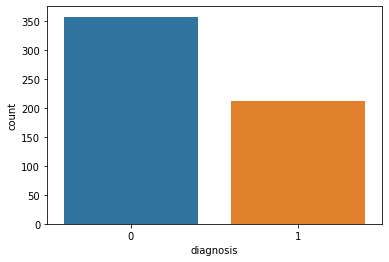

In [23]:
# Division of data into Beningn and Malignant(0 and 1)
sns.countplot(data['diagnosis'],label="Count")

Principle Component Analysis
The purpose for doing principal component analysis on the labeled data here is to observe the variance explained by each of the components and the associated weights assigned to each feature. The resulting output will aid in deciding on which features to drop.

In [24]:
from sklearn.decomposition import PCA

In [25]:
# useful_data
useful_data = data.iloc[:,1:]
pca = PCA(n_components=3)
pca.fit(useful_data)

# Dimmension indexing
dimmensions  = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4),columns=useful_data.keys())
components.index = dimmensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_),1)
variancce_rations = pd.DataFrame(np.round(ratios,4),columns=['Explained Variance'])
variancce_rations.index = dimmensions

print(pd.concat([variancce_rations, components], axis=1))

             Explained Variance  ...  fractal_dimension_worst
Dimension 1              0.9820  ...                   0.0000
Dimension 2              0.0162  ...                  -0.0001
Dimension 3              0.0016  ...                  -0.0000

[3 rows x 31 columns]


Observations
It can be observed that 98.20% of the variance is explained in dimmension 1. This means that nearly all of the variance in the data can be described by one dimmension. The remaining two describe a much smaller amount of the variance

In dimmension 1, most of the feature weight is associated with the area_mean and area_worst dimmension. Due to this, in the next step, I will visualize how well each of the mean features as well as area_worst and perimeter_worst explain the resulting diagnosis.

While we will not be using PCA in the actual machine learning phase, this describes the data well and helps understand which features should be further investogated for their importance in the final prediction.

Feature Selection

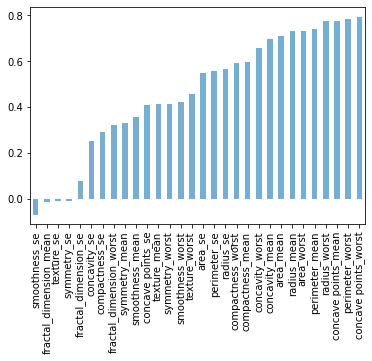

In [26]:
# Observe correlation to the diagnosis
tst = data.corr()['diagnosis'].copy()
tst = tst.drop('diagnosis')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)
plt.show()

In [27]:
# Seperate out maligant and benign data for graphing
malignant = data[data['diagnosis'] == 1]
benign = data[data['diagnosis'] == 0]

In [28]:
# Column names to observe in following graphs - mean values only
observe = list(data.columns[1:11]) + ['area_worst'] + ['perimeter_worst']
observables = data.loc[:,observe]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


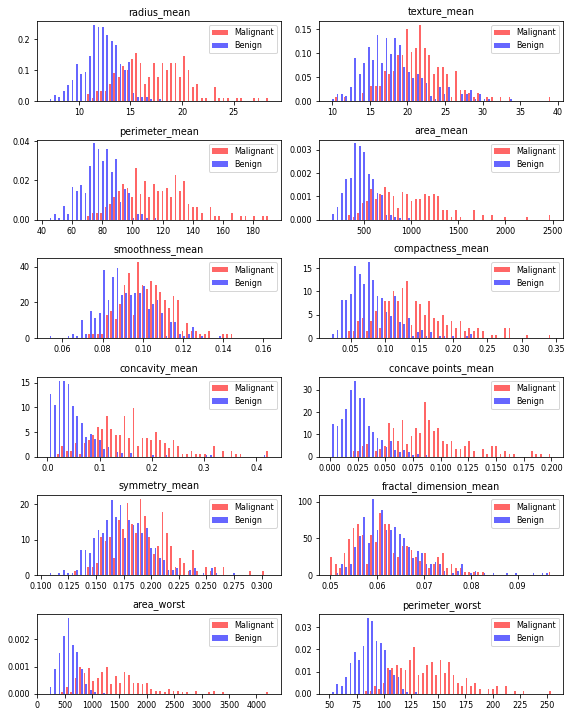

In [29]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=6, ncols=2, figsize=(8,10))
graphs = graphs.flatten()
for idx, graph in enumerate(graphs):
    graph.figure
    
    binwidth= (max(data[observe[idx]]) - min(data[observe[idx]]))/50
    bins = np.arange(min(data[observe[idx]]), max(data[observe[idx]]) + binwidth, binwidth)
    graph.hist([malignant[observe[idx]],benign[observe[idx]]], bins=bins, alpha=0.6, density=True, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(observe[idx])
plt.tight_layout()

Observations
From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

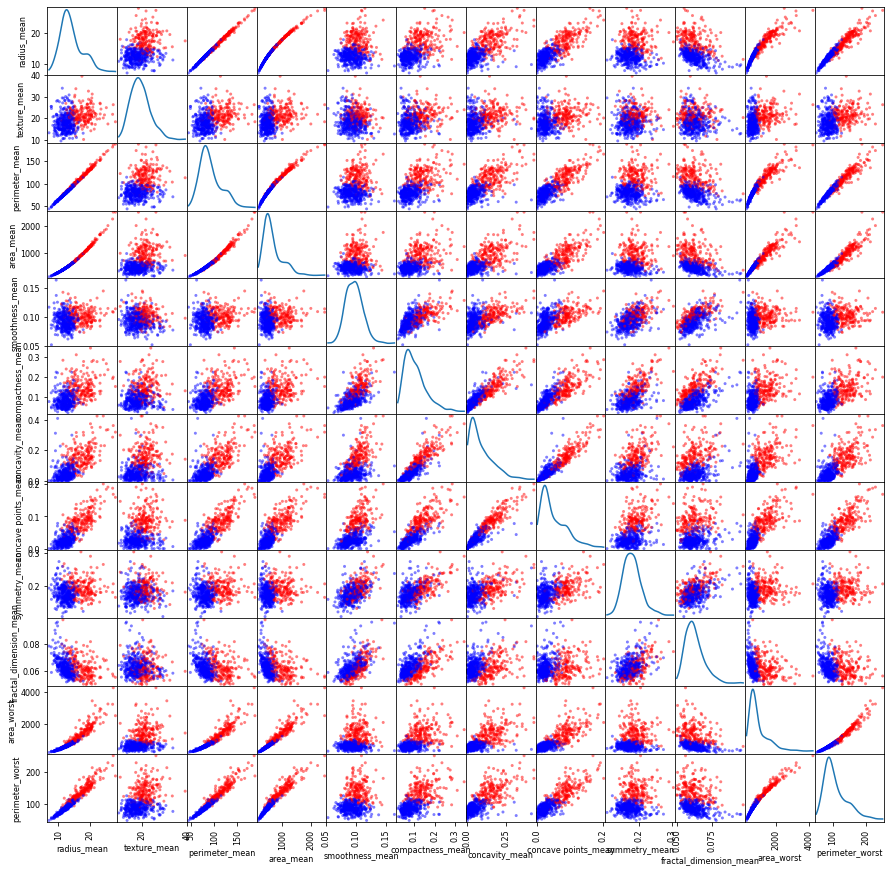

In [30]:

color_wheel = {0: "blue", 1: "red"}
colors = data["diagnosis"].map(lambda x: color_wheel.get(x))
pd.plotting.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde');

Observations
The scatter matrix clarifies a few more points. The perimeter_mean, area_mean and radius mean have a strong, positive, linear correlation. Most other data also has a more rough linear correlation to other features with the exception of fractal_dimension_mean, symmetry_mean and smoothness_mean.

Within these three features we can see quite a bit of mixing between malignant and benign cancer in the scatter matrix. This suggests that our assumption above, that they do not aid in predicting cancer type, is likely correct. There is less correlation and separability between the two diagnoses.

Due to the lack of clear separability and lack of variance explained I feel comfortable dropping them.

Trimming Data
From observing the graphs and PCA data above: fractal_dimension_mean, smoothness_mean and symmetry_mean are not very useful in predicting the type of cancer. To aid in the learning process and remove noise, these columns will be dropped.

In [31]:
# Drop columns that do not aid in predicting type of cancer
observables.drop(['fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean'],axis=1,inplace=True)

Classification
Here a comparison will be made between the different types of learning algorithms. At the end a breakdown of the data and explanation of the algorithm’s performance will be made.

In [32]:
# Split data appropriately
X = observables
y = data['diagnosis']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
## from sklearn.cross_validation import cross_val_score ## ERROR
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()

Parameter tuning: optimizing the number of neighbors (k)

For optimization purposes it is suggested using the training data; and for performance estimation or to figure out the best model, the test data will be used.

[0.845 0.799 0.879 0.832 0.872 0.846 0.879 0.859 0.866 0.859 0.872 0.852
 0.872 0.839 0.846 0.825 0.832 0.825 0.825 0.812 0.812 0.799 0.805 0.792
 0.799 0.792 0.792 0.792 0.799 0.792 0.792 0.792 0.792 0.792 0.792 0.785
 0.785 0.779 0.792 0.779 0.792 0.785 0.785 0.785 0.792 0.785 0.799 0.779
 0.792]


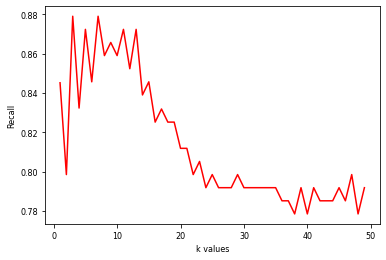

In [34]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='recall')
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

From the above plot the optimal k value is somewhere between 1 and 10. Looking at the scores, at k=5 we have the highest recall/sensitivity. We can use a more efficient parameter tuning approach called GridSearchCV as shown below which basically automates the search process and it also fits the optimal parameter to the training data.

In [35]:
## from sklearn.grid_search import GridSearchCV ## ERROR
from sklearn.model_selection import learning_curve, GridSearchCV
k_range=list(range(1,50))
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy', 'recall'] # evaluation scores for selecting best parameter
for sc in scores:
    grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn.fit(X_train,y_train)
    print(grid_knn.best_params_)
    print(np.round(grid_knn.best_score_,3))

# Tuning hyper-parameters for accuracy
{'n_neighbors': 11}
0.927
# Tuning hyper-parameters for recall
{'n_neighbors': 3}
0.879


Here, the optimal n_neighbors according to recall score (sensitivity) k=7 which is same for that of accuracy score.

SVM

In [36]:
## from sklearn.cross_validation import cross_val_score ## ERROR
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy', 'recall']
for sc in scores:
    grid=GridSearchCV(svc,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X,y)
    print(grid.best_params_)
    print(np.round(grid.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 100, 'kernel': 'linear'}
0.96
# Tuning hyper-parameters for recall
{'C': 100, 'kernel': 'linear'}
0.934


Using accuracy and recall as scoring metrics, both give the same model as optimal i.e. {‘C’: 100, ‘kernel’: ‘linear’}. Here below, we fit this model to the data and do visualization of the results.

Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import cross_val_score
#from sklearn.grid_search import GridSearchCV
#from sklearn.model_selection import learning_curve, GridSearchCV
lgr = LogisticRegression()

#parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
scores = ['accuracy', 'recall']
for sc in scores:
    grid_lgr=GridSearchCV(lgr,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_lgr.fit(X_train,y_train)
    print(grid_lgr.best_params_)
    print(np.round(grid_lgr.best_score_,3))

# Tuning hyper-parameters for accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'C': 1000}
0.957
# Tuning hyper-parameters for recall
{'C': 1000}
0.926


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


SVC and Logistic regression scored similar performance, but we should be careful since the model has not yet tested on test data or on data independent of the one used for training the models. Below, we fit the three models onto the test data (X_test) and compare the predictions (y_predict) with observations (y_test). For this purpose, various evaluation metrics are implemented.

Random Forest¶

In [38]:
################## Random Forest #################################
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuarcy :", model.score(X_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[105   3]
 [  2  61]]


Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# creating a model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuarcy :", model.score(X_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.9415204678362573
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       108
           1       0.88      0.97      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171

[[100   8]
 [  2  61]]


Neural Networks – Multi Layer Perceptron

In [40]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = (200, 200), max_iter = 200)

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuarcy :", model.score(X_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.914572864321608
Testing accuarcy : 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       108
           1       1.00      0.81      0.89        63

    accuracy                           0.93       171
   macro avg       0.95      0.90      0.92       171
weighted avg       0.94      0.93      0.93       171

[[108   0]
 [ 12  51]]


Model Selection

KNN:
 confusion matrix
 [[103   5]
 [  4  59]] 


Confusion matrix plot of KNN classifier


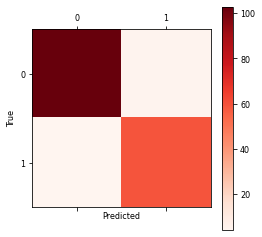


 Classification report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

#############################################################################
SVC:
 confusion matrix
 [[97 11]
 [ 6 57]] 


Confusion matrix plot of SVC


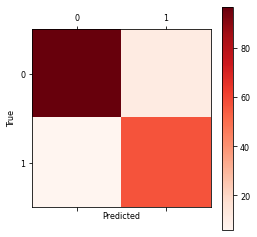


 Classification report 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       108
           1       0.84      0.90      0.87        63

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171

#############################################################################
Logistic Regression:
confusion matrix
 [[104   4]
 [  2  61]] 


Confusion matrix plot of Logistic regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


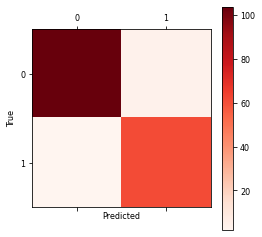


 Classification report 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# KNN
# fitting the knn model on the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn =knn.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_knn)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_knn))
print ('#############################################################################')

# SVC
# fitting the SVC model on the training data and predicting for test data
svc=SVC(C=100,gamma=0.001,kernel='rbf',probability=True)
svc.fit(X_train, y_train)
y_pred_svc =svc.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_svc)
print('SVC:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of SVC')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_svc))
print ('#############################################################################')

# Logistic Regression
# fitting the lgr model on the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)
y_pred_lgr =lgr.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_lgr)
print('Logistic Regression:\nconfusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of Logistic regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_lgr))

Make table here for all three methods with precision recall f1score

model: KNN
thresholds: [2.  1.  0.8 0.6 0.4 0.2 0. ]
tpr:        [0.    0.698 0.841 0.937 0.937 0.952 1.   ]
fpr:        [0.    0.    0.028 0.046 0.083 0.176 1.   ]
model: SVC
thresholds: [2.    1.    0.986 0.956 0.94  0.926 0.925 0.837 0.835 0.808 0.807 0.783
 0.677 0.638 0.365 0.354 0.124 0.12  0.075 0.075 0.071 0.07  0.021 0.021
 0.019 0.017 0.   ]
tpr:        [0.    0.016 0.016 0.048 0.048 0.127 0.127 0.492 0.492 0.651 0.651 0.857
 0.857 0.905 0.905 0.921 0.921 0.937 0.937 0.952 0.952 0.968 0.968 0.984
 0.984 1.    1.   ]
fpr:        [0.    0.    0.009 0.009 0.019 0.019 0.028 0.028 0.037 0.037 0.046 0.046
 0.083 0.083 0.139 0.139 0.287 0.287 0.565 0.565 0.611 0.611 0.852 0.852
 0.88  0.88  1.   ]
model: Logistic
thresholds: [2.00e+00 1.00e+00 9.27e-01 9.00e-01 5.88e-01 4.53e-01 4.29e-01 1.16e-01
 1.11e-01 1.00e-03]
tpr:        [0.    0.016 0.841 0.841 0.968 0.968 0.984 0.984 1.    1.   ]
fpr:        [0.    0.    0.    0.009 0.009 0.056 0.056 0.222 0.222 1.   ]


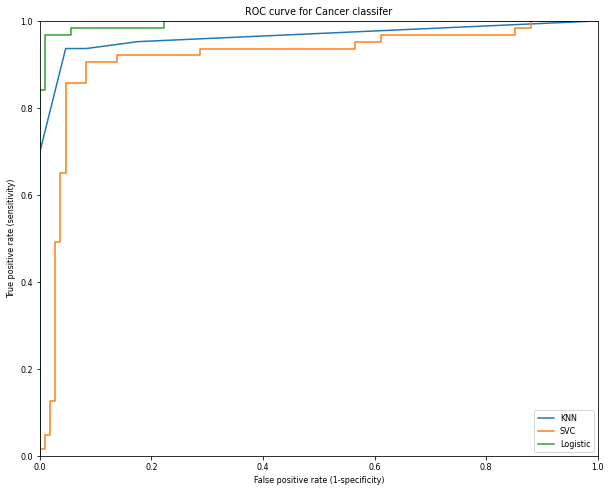

In [42]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_knn_p =knn.predict_proba(X_test)[:,1]
y_pred_svc_p =svc.predict_proba(X_test)[:,1]
y_pred_lgr_p =lgr.predict_proba(X_test)[:,1]

models=[y_pred_knn_p,y_pred_svc_p,y_pred_lgr_p]
label=['KNN','SVC','Logistic']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    print('model:',label[m])
    print('thresholds:',np.round(thresholds,3))
    print('tpr:       ',np.round(tpr,3))
    print('fpr:       ',np.round(fpr,3))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)